In [10]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [11]:
# Load the annotation data
df = pd.read_csv('C:/Users/USER/comp_vision_crop/labels_project.csv')

df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,grass,698,3152,1011,246,1.PNG,2160,3840
1,crop,817,1461,501,501,1.PNG,2160,3840
2,grass,287,1363,124,124,10.PNG,2160,3840
3,crop,907,878,527,407,10.PNG,2160,3840
4,crop,791,1053,867,731,11.PNG,2160,3840


In [12]:
image_path = df['image_name'].iloc[0]
print(image_path)

1.PNG


In [13]:
image = cv2.imread("./labeled/"+image_path)
print(image)

[[[230 190 123]
  [230 190 123]
  [230 190 123]
  ...
  [114 116  83]
  [114 116  83]
  [114 116  83]]

 [[230 190 123]
  [230 190 123]
  [230 190 123]
  ...
  [114 116  83]
  [114 116  83]
  [114 116  83]]

 [[230 190 123]
  [230 190 123]
  [230 190 123]
  ...
  [115 116  85]
  [115 116  85]
  [115 116  85]]

 ...

 [[ 27  49  36]
  [ 26  48  35]
  [ 24  46  32]
  ...
  [  8  26  19]
  [  7  25  18]
  [  7  25  18]]

 [[ 26  48  35]
  [ 24  46  32]
  [ 19  41  28]
  ...
  [  8  26  19]
  [  7  25  18]
  [  7  25  18]]

 [[ 24  46  32]
  [ 19  41  28]
  [ 13  35  22]
  ...
  [  7  25  18]
  [  6  24  17]
  [  6  24  17]]]


In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

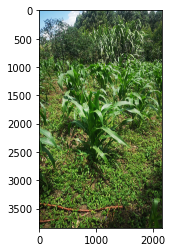

In [15]:
# Plot the original image
plt.imshow(image)
plt.show()

In [16]:
# Function to extract ORB features
def extract_orb_features(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return descriptors

# Function to extract pixel values
def extract_pixel_values(image):
    return image.flatten()

# Create empty lists to store features and labels
features = []
labels = []

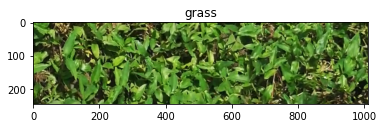

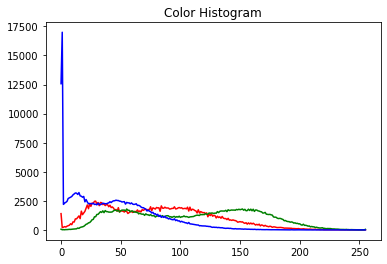

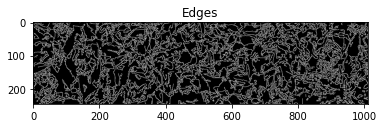

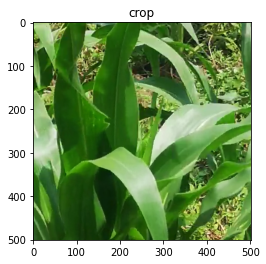

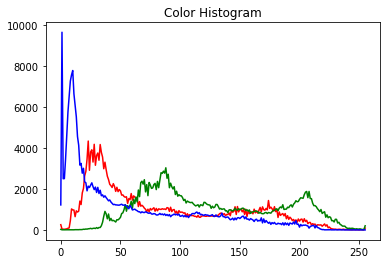

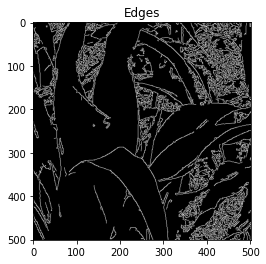

In [17]:
# For each crop and grass in the image
for i, row in df[df['image_name'] == image_path].iterrows():
    # Get the bounding box
    bbox_x = row['bbox_x']
    bbox_y = row['bbox_y']
    bbox_width = row['bbox_width']
    bbox_height = row['bbox_height']

    # Crop the image
    crop = image[bbox_y:bbox_y+bbox_height, bbox_x:bbox_x+bbox_width]
    
    # Show the cropped image
    plt.imshow(crop)
    plt.title(row['label_name'])
    plt.show()

    # Calculate and plot color histogram for each color channel
    for i, color in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([crop], [i], None, [256], [0,256])
        plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.show()

    # Apply Canny edge detection and show the result
    edges = cv2.Canny(crop, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.show()

In [23]:
# Extract ORB features
orb_features = extract_orb_features(crop)
print("ORB Features:")
print(orb_features)

    # Extract pixel values
pixel_values = extract_pixel_values(crop)
print("Pixel Values:")
# Select the desired columns for features and labels
feature_columns = ['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height', 'image_width', 'image_height']
label_column = 'label_name'

# Create arrays for features and labels
features = df[feature_columns].values
labels = df[label_column].values
print(pixel_values)

ORB Features:
[[ 60 104  88 ... 251 102 162]
 [  6 180 253 ...  64 135 242]
 [211 190 122 ...  68 171 207]
 ...
 [137 128  17 ...   8 193  35]
 [ 58  40 243 ...  76 221 222]
 [ 70 179 138 ... 124 143 211]]
Pixel Values:
[102 168  64 ...  28  29  11]


In [25]:
# Select the desired columns for features and labels
feature_columns = ['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height', 'image_width', 'image_height']
label_column = 'label_name'

# Create arrays for features and labels
features = df[feature_columns].values
labels = df[label_column].values


In [26]:
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (12, 6)
Labels shape: (12,)


In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [33]:
# Evaluate k-NN classifier
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

print("k-NN Performance:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)



k-NN Performance:
Accuracy: 0.6666666666666666
Precision: 0.8333333333333334
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


In [35]:
# Compute and print classification report
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

Classification Report:
              precision    recall  f1-score   support

        crop       0.50      1.00      0.67         1
       grass       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [36]:
# Compute confusion matrix
confusion = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1 0]
 [1 1]]


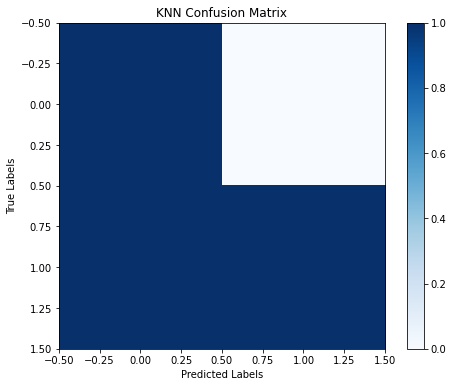

In [43]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()